
# **Laboratory Exercise 1: Linear Regression Implementation**


### Name: Vanesse V. Reyes
### Section: BSCS - 3BIS
### Course: CCST 102 | Basic Machine Learning
### Topic 2: Supervised LEarning Fundamentals


In [8]:
#@title # **1. Data Preprocessing**

# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'datasets_house_prices.csv'
data_frame = pd.read_csv(file_path)

# Display the initial rows of the dataset
print("Initial rows of the dataset:")
print(data_frame.head())

# Check for missing values
print("\nCount of missing values in each column:")
print(data_frame.isnull().sum())

# Remove rows with missing values
data_frame_cleaned = data_frame.dropna()

# Verify that there are no missing values left
print("\nCount of missing values after cleanup:")
print(data_frame_cleaned.isnull().sum())

# Normalize the features
# Selecting relevant features for normalization (excluding target variable 'Price')
feature_columns = data_frame_cleaned[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
price_column = data_frame_cleaned['Price']

# Initialize the scaler
scaler_instance = StandardScaler()

# Fit and transform the features
scaled_data = scaler_instance.fit_transform(feature_columns)

# Create a DataFrame with the normalized features
normalized_data_frame = pd.DataFrame(scaled_data, columns=feature_columns.columns)
normalized_data_frame['Price'] = price_column.values

# Display the initial rows of the normalized DataFrame
print("\nInitial rows of the normalized dataset:")
print(normalized_data_frame.head())

Initial rows of the dataset:
   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05

Count of missing values in each column:
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64

Count of missing values after cleanup:
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64

Initial rows of the normalized dataset:
   Size (sqft)  Bedroom

In [11]:
#@title # **2. Model Implementation**

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'datasets_house_prices.csv'
data_frame = pd.read_csv(file_path)

# Handle missing values
data_frame_cleaned = data_frame.dropna()

# Normalize the features
feature_columns = data_frame_cleaned[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
target_column = data_frame_cleaned['Price']

# Initialize the scaler and fit_transform
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_columns)

# Create a normalized DataFrame
normalized_df = pd.DataFrame(scaled_features, columns=feature_columns.columns)
normalized_df['Price'] = target_column.values

# Define the SimpleLinearRegression class
class SimpleLinearRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, features, target):
        features_with_bias = np.hstack([np.ones((features.shape[0], 1)), features])
        params = np.linalg.inv(features_with_bias.T @ features_with_bias) @ features_with_bias.T @ target
        self.intercept = params[0]
        self.coefficients = params[1:]

    def predict(self, features):
        return features @ self.coefficients + self.intercept

# Extracting features and target variable from normalized DataFrame
feature_matrix = normalized_df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']].values
target_values = normalized_df['Price'].values

# Initialize and train the linear regression model
linear_model = SimpleLinearRegression()
linear_model.fit(feature_matrix, target_values)

# Print coefficients and intercept
print("Model Coefficients:", linear_model.coefficients)
print("Model Intercept:", linear_model.intercept)

# Function to estimate house prices based on input features
def estimate_price(input_features):
    input_array = np.array(input_features).reshape(1, -1)
    normalized_input = scaler.transform(input_array)  # Normalize input
    return linear_model.predict(normalized_input)[0]

# Example prediction
sample_features = [3974, 1, 97, 2.032719038]  # Example: Size (sq. ft.), Bedrooms, Age, Proximity to Downtown (miles)
predicted_house_price = estimate_price(sample_features)
print("Predicted Price for the sample features:", predicted_house_price)

Model Coefficients: [279093.75957568   6865.10416962  -5830.96824417  -8219.86434429]
Model Intercept: 719053.2124580999
Predicted Price for the sample features: 1176151.1558759238


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
#@title # **3. Model Training**


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features and target variable from normalized DataFrame
features = normalized_df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']].values
target = normalized_df['Price'].values

# Split the data into training and testing sets (80% train, 20% test)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
linear_model = SimpleLinearRegression()
linear_model.fit(features_train, target_train)

# Predict on the training set
predictions_train = linear_model.predict(features_train)

# Calculate the Mean Squared Error (MSE) on the training data
mse_training = mean_squared_error(target_train, predictions_train)
print("Mean Squared Error on the training set:", mse_training)


Mean Squared Error on the training set: 102060369.47883411


Mean Squared Error on the testing set: 103564728.17767784


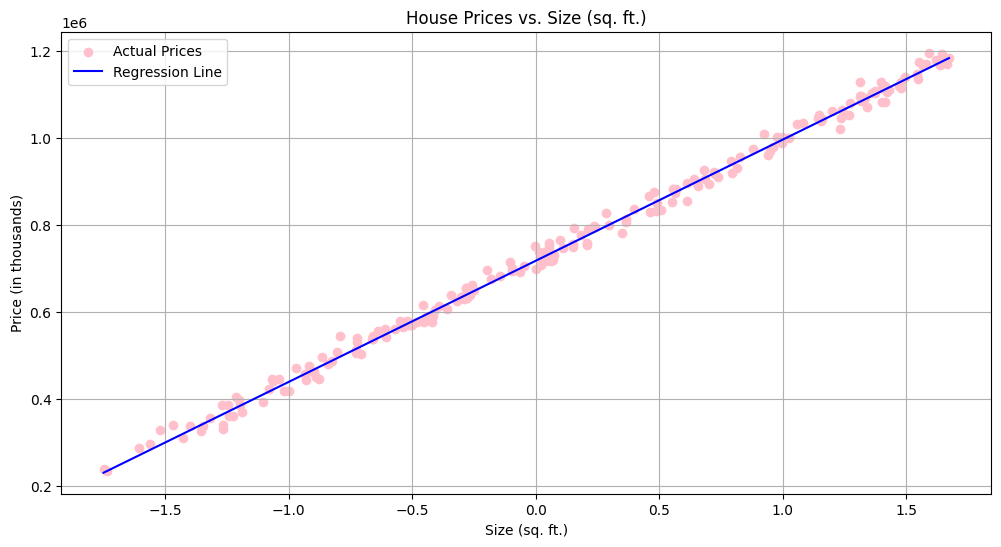

In [16]:
#@title # **4. Model Evaluation**

import matplotlib.pyplot as plt

# Predict on the testing set
predicted_test_prices = linear_model.predict(features_test)

# Calculate the Mean Squared Error (MSE) on the testing data
mse_testing = mean_squared_error(target_test, predicted_test_prices)
print("Mean Squared Error on the testing set:", mse_testing)

# Plotting the regression line along with the test data points
plt.figure(figsize=(12, 6))

# Scatter plot of actual prices
plt.scatter(features_test[:, 0], target_test, color='pink', label='Actual Prices')

# Create a grid of values for 'Size (sq. ft.)'
size_values = np.linspace(features_test[:, 0].min(), features_test[:, 0].max(), 100).reshape(-1, 1)

# Predict prices for the grid of 'Size (sq. ft.)' values
mean_bedrooms_val = np.mean(features_test[:, 1])
mean_age_val = np.mean(features_test[:, 2])
mean_proximity_val = np.mean(features_test[:, 3])
grid_features = np.hstack([size_values,
                            np.full((size_values.shape[0], 1), mean_bedrooms_val),
                            np.full((size_values.shape[0], 1), mean_age_val),
                            np.full((size_values.shape[0], 1), mean_proximity_val)])
predicted_prices_line = linear_model.predict(grid_features)

# Plotting the regression line
plt.plot(size_values, predicted_prices_line, color='blue', label='Regression Line')

plt.xlabel('Size (sq. ft.)')
plt.ylabel('Price (in thousands)')
plt.title('House Prices vs. Size (sq. ft.)')
plt.legend()
plt.grid(True)  # Optional: Add a grid for better readability
plt.show()